In [1]:
#setup kaggle
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"biswajit01","key":"c1f50353aa65dbbf7079446c330b5e0d"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!rm -rf sample_data

In [7]:
!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 15.1MB/s]


In [8]:
!unzip diabetes-dataset.zip -d data

Archive:  diabetes-dataset.zip
  inflating: data/diabetes.csv       


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [10]:
df=pd.read_csv("/content/data/diabetes.csv")

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
#describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
#calculating total number of nan value counts
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
#value specific counts of pregnancies column
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [16]:
palette=sns.color_palette("hls")
sns.set_palette(palette)

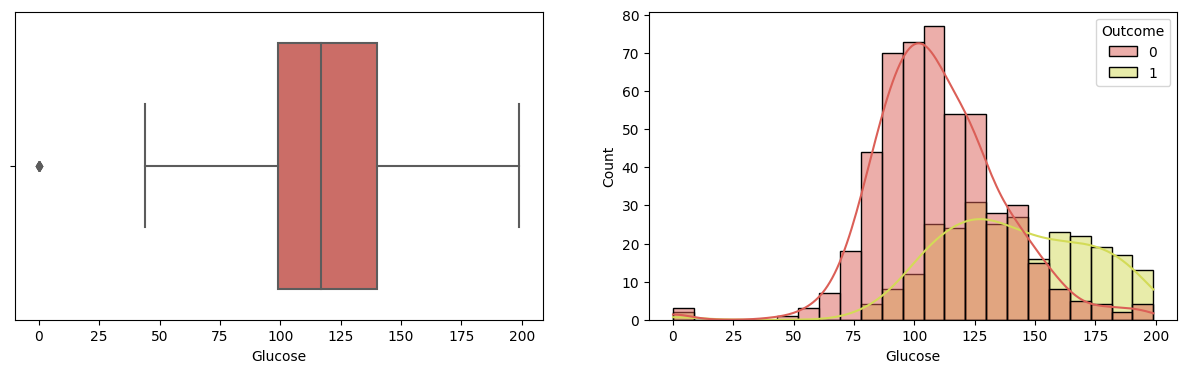

In [17]:
#box plot and histogram plot of glucose column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='Glucose', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="Glucose",kde=True)

plt.show()

In [18]:
#the data is little bit right skewed and outlier count is low, so we can keep the outlier value

In [19]:
#check the data counts which have glucose value 0
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


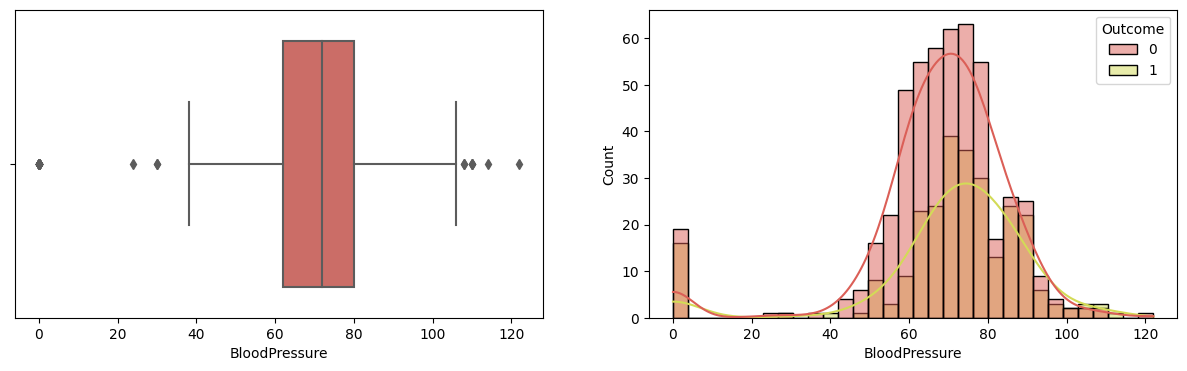

In [20]:
#box plot and histogram plot of bloodPressurw
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='BloodPressure', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="BloodPressure",kde=True)

plt.show()

In [21]:
#checking the bloodpressure data is skewed or not
df['BloodPressure'].skew()

-1.8436079833551302

In [22]:
#its negative so,its not skewed
#another statistical measure for the bloodpressure column
print("Mean value of bp",df['BloodPressure'].mean())
print("Median value of bp",df['BloodPressure'].median())
print("Standard deviation of bp",df['BloodPressure'].std())
print("Minimum value of bp",df['BloodPressure'].min())
print("Maximum value of bp",df['BloodPressure'].max())

Mean value of bp 69.10546875
Median value of bp 72.0
Standard deviation of bp 19.355807170644777
Minimum value of bp 0
Maximum value of bp 122


In [23]:
#here i used zscore =2 ,above the 2 or below 2 will consider as outlier
# below i added the link from where i got the list of blood pressures
# https://emoha.com/blogs/health/what-is-normal-bp-range-for-women-and-men

In [24]:
#calculating the upper and lower limit to detect the outliers
upper_limit = df['BloodPressure'].mean() + 2*df['BloodPressure'].std()
lower_limit = df['BloodPressure'].mean() - 2*df['BloodPressure'].std()
print(upper_limit,lower_limit)

107.81708309128956 30.393854408710446


In [25]:
#count the values which are above the upper and below the lower limit
len(df[(df['BloodPressure'] > upper_limit) | (df['BloodPressure'] < lower_limit)])

45

In [26]:
#its a big number if removed it will be bad for model training, so will modify them

#creating another column in the dataframe to load the modified value of bloodpressure and ploting the values, if any problem occured we will
#drop the new column and treat the outliers again by using original columns value

#blood pressure 0 not possible because BloodPressure 0 means the body is dead
#minimum 60-70 can be consideres as normal blood pressure, so replacing it with the mean of blood pressure
bp_mean=df['BloodPressure'].mean()
df['BloodPressure'] = np.where(
    df['BloodPressure']>upper_limit,
    bp_mean,
    np.where(
        df['BloodPressure']<lower_limit,
        bp_mean,
        df['BloodPressure']
    )
)
df['BloodPressure'].describe()

count    768.000000
mean      72.027013
std       11.170450
min       38.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      106.000000
Name: BloodPressure, dtype: float64

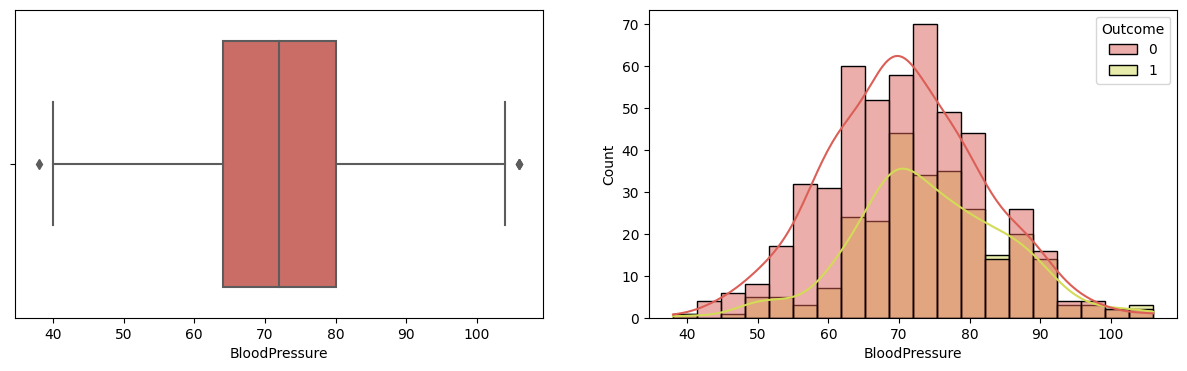

In [29]:
#ploting the bloodpressure modified column to check the outliers
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='BloodPressure', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="BloodPressure",kde=True)

plt.show()

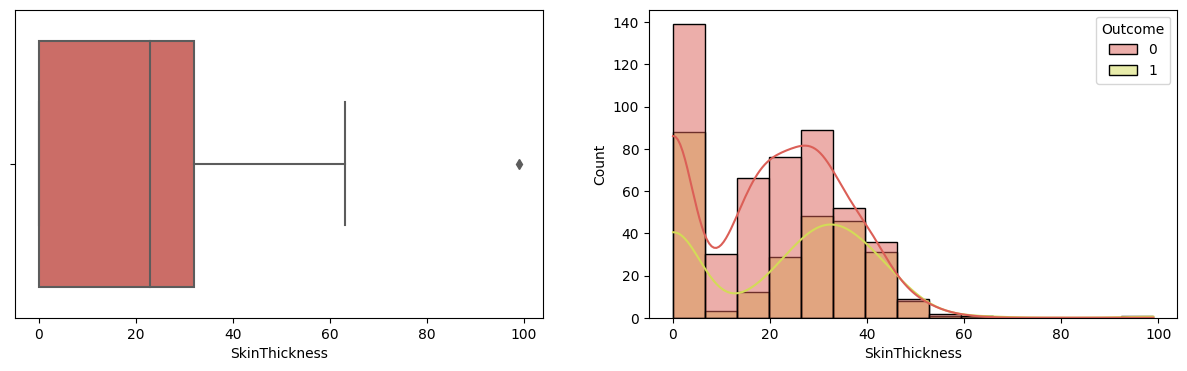

In [30]:
#box plot and histogram plot of bloodPressurw
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='SkinThickness', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="SkinThickness",kde=True)

plt.show()

In [31]:
#checking skinthickness column is skewed or not
df['SkinThickness'].skew()

0.10937249648187608

In [32]:
# will use iqr technique to remove the outlier

df['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [33]:
# reference url of skin thickness : https://www.medicalnewstoday.com/articles/thin-skin-vs-thick-skin#thin-skin
#considering the skin thickness is the value of  epedermis(Which is the first layer of skin in human) thickness in micrometer unit (μm)
# also considering the 0 value as null values

In [34]:
#statistical info of insulin
df['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

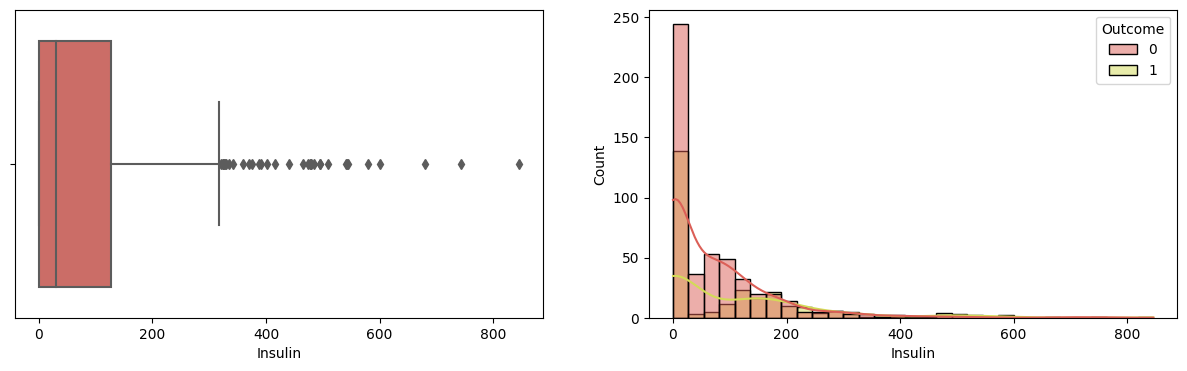

In [35]:
#ploting the visualization of insulin
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='Insulin', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="Insulin",kde=True)

plt.show()

In [36]:
#its right skewed, so we can use iqr to remove the outlier
percentile25 = df['Insulin'].quantile(0.25)
percentile75 = df['Insulin'].quantile(0.75)

iqr = percentile75 - percentile25

upper_insulin_limit = percentile75 + 1.5 * iqr
lower_insulin_limit = percentile25 - 1.5 * iqr

print("percentile25 ",percentile25)
print("percentile75 ",percentile75)
print("iqr ",iqr)
print("upper_limit ",upper_insulin_limit)
print("lower limit ",lower_insulin_limit)

percentile25  0.0
percentile75  127.25
iqr  127.25
upper_limit  318.125
lower limit  -190.875


In [37]:
#listing the data points which are above upper and below lower insulin
df[(df['Insulin'] > upper_insulin_limit) | (df['Insulin'] < lower_insulin_limit)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70.0,45,543,30.5,0.158,53,1
13,1,189,60.0,23,846,30.1,0.398,59,1
54,7,150,66.0,42,342,34.7,0.718,42,0
111,8,155,62.0,26,495,34.0,0.543,46,1
139,5,105,72.0,29,325,36.9,0.159,28,0
153,1,153,82.0,42,485,40.6,0.687,23,0
186,8,181,68.0,36,495,30.1,0.615,60,1
220,0,177,60.0,29,478,34.6,1.072,21,1
228,4,197,70.0,39,744,36.7,2.329,31,0
231,6,134,80.0,37,370,46.2,0.238,46,1


In [38]:
df[df['Insulin']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35,0,33.6,0.627,50,1
1,1,85,66.000000,29,0,26.6,0.351,31,0
2,8,183,64.000000,0,0,23.3,0.672,32,1
5,5,116,74.000000,0,0,25.6,0.201,30,0
7,10,115,69.105469,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74.000000,31,0,44.0,0.403,43,1
762,9,89,62.000000,0,0,22.5,0.142,33,0
764,2,122,70.000000,27,0,36.8,0.340,27,0
766,1,126,60.000000,0,0,30.1,0.349,47,1


In [40]:
#replacing the insulin values which are greater than upper limit
df['Insulin'] = np.where(df['Insulin']>upper_insulin_limit,upper_insulin_limit,df['Insulin'])
df['Insulin'].describe()

count    768.000000
mean      73.652669
std       93.576029
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      318.125000
Name: Insulin, dtype: float64

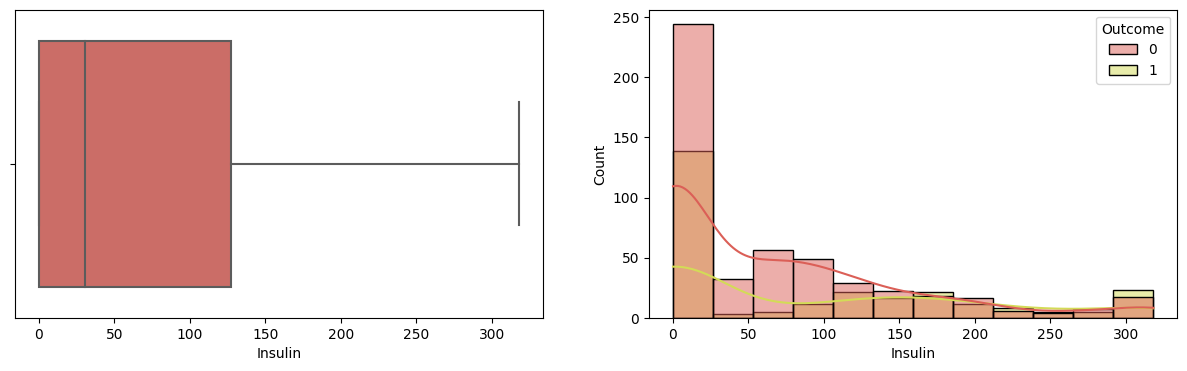

In [41]:
#ploting the visualization of insulin after replacing the outliers
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='Insulin', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="Insulin",kde=True)

plt.show()

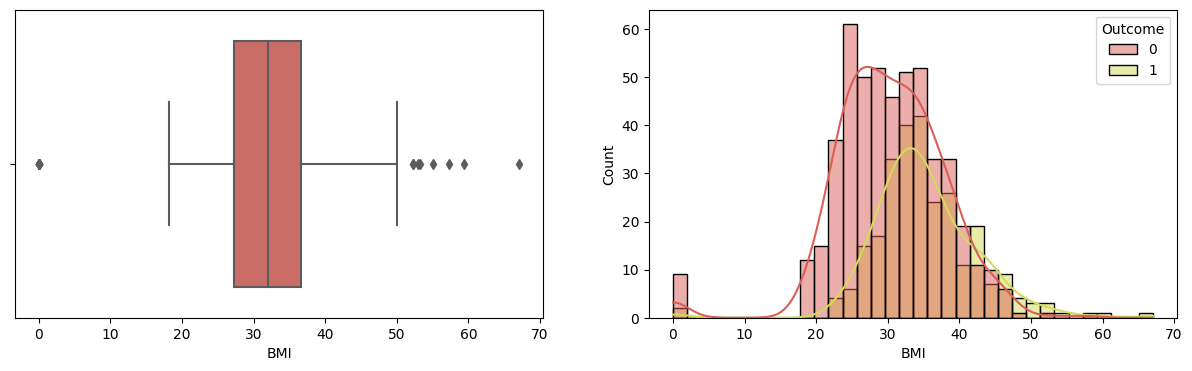

In [42]:
#visulaizing body mass index
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='BMI', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="BMI",kde=True)

plt.show()

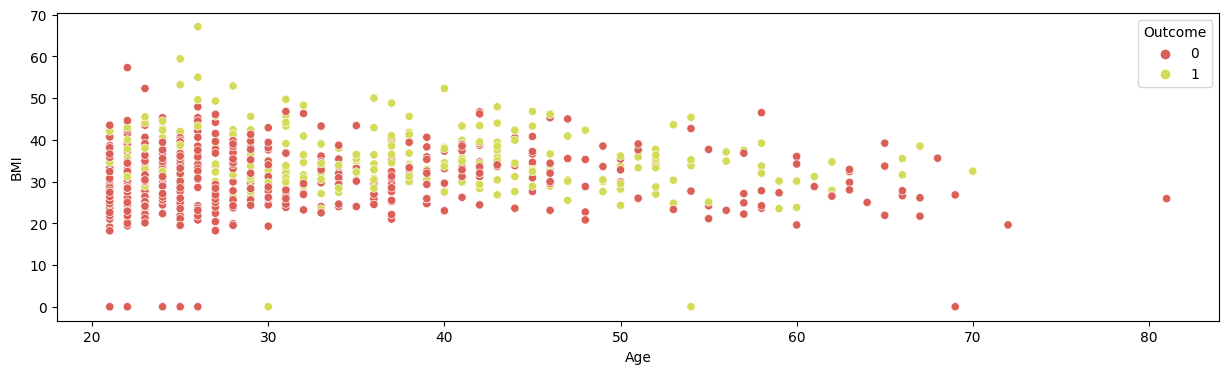

In [43]:
#ploting bmi and age
fig = plt.figure(figsize=[15,4])

sns.scatterplot(data=df, x="Age", y="BMI",  hue="Outcome")

plt.show()

In [44]:
df['BMI'].skew()

-0.42898158845356543

In [45]:
#its negative so,its not skewed
#another statistical measure for the BMI column
print("Mean value of BMI",df['BMI'].mean())
print("Median value of BMI",df['BMI'].median())
print("Standard deviation of BMI",df['BMI'].std())
print("Minimum value of BMI",df['BMI'].min())
print("Maximum value of BMI",df['BMI'].max())

Mean value of BMI 31.992578124999998
Median value of BMI 32.0
Standard deviation of BMI 7.884160320375446
Minimum value of BMI 0.0
Maximum value of BMI 67.1


In [46]:
# used zscore =2 ,above the 2 or below 2 will consider as outlier
#calculating the upper and lower limit to detect the outliers
upper_bmi_limit = df['BMI'].mean() + 3*df['BMI'].std()
lower_bmi_limit = df['BMI'].mean() - 3*df['BMI'].std()
print(upper_bmi_limit,lower_bmi_limit)

55.64505908612634 8.340097163873661


In [47]:
#listing the data points which are above upper and below lower BMI
df[(df['BMI'] > upper_bmi_limit) | (df['BMI'] < lower_bmi_limit)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,insulin_modified
9,8,125,96.000000,0,0.0,0.0,0.232,54,1,0.0
49,7,105,69.105469,0,0.0,0.0,0.305,24,0,0.0
60,2,84,69.105469,0,0.0,0.0,0.304,21,0,0.0
81,2,74,69.105469,0,0.0,0.0,0.102,22,0,0.0
145,0,102,75.000000,23,0.0,0.0,0.572,21,0,0.0
177,0,129,69.105469,46,130.0,67.1,0.319,26,1,130.0
371,0,118,64.000000,23,89.0,0.0,1.731,21,0,89.0
426,0,94,69.105469,0,0.0,0.0,0.256,25,0,0.0
445,0,180,78.000000,63,14.0,59.4,2.420,25,1,14.0
494,3,80,69.105469,0,0.0,0.0,0.174,22,0,0.0


In [49]:
#https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl.pdf
#according to the health report BMI
# <18.5  underweight
# 18.5—24.9	Healthy Weight
# 25.0—29.9	Overweight
# 30.0 and Above	Obesity
# so replacing the outliers with lower and upper limit values
df['BMI'] = np.where(
    df['BMI']>upper_bmi_limit,
    upper_bmi_limit,
    np.where(
        df['BMI']<lower_bmi_limit,
        lower_bmi_limit,
        df['BMI']
    )
)
df['BMI'].describe()


count    768.000000
mean      32.090073
std        7.366246
min        8.340097
25%       27.300000
50%       32.000000
75%       36.600000
max       55.645059
Name: BMI, dtype: float64

In [50]:
# diabetes pedigree function determines the risk of type 2 diabetes based on family history, the larger the function, the higher the risk of type 2 diabetes
# so, the column contain the values of risk, so keeping the column as it is

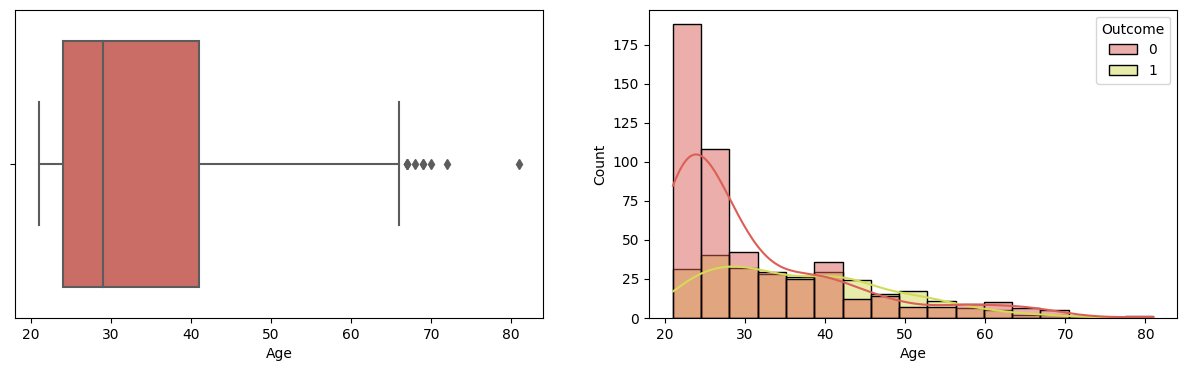

In [51]:
#visulaizing body mass index
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='Age', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="Age",kde=True)

plt.show()

In [52]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,insulin_modified,bmi_modified
0,6,148,72.0,35,0.0,33.6,0.627,50,1,0.0,33.6
1,1,85,66.0,29,0.0,26.6,0.351,31,0,0.0,26.6
2,8,183,64.0,0,0.0,23.3,0.672,32,1,0.0,23.3


In [53]:
#droping some old columns which are not needed for the training
df=df.drop(['insulin_modified','bmi_modified'],axis=1)

In [54]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0.0,33.6,0.627,50,1
1,1,85,66.0,29,0.0,26.6,0.351,31,0
2,8,183,64.0,0,0.0,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1


In [55]:
#separating the independent and dependent columns
x=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [57]:
y.unique()

array([1, 0])

In [59]:
def evaluate_model(true, predicted):
    # mae = mean_absolute_error(true, predicted)
    # mse = mean_squared_error(true, predicted)
    # rmse = np.sqrt(mean_squared_error(true, predicted))
    # r2_square = r2_score(true, predicted)
    accuracy_score = metrics.accuracy_score(true, predicted)
    return accuracy_score
    #return mae, rmse, r2_square

In [60]:
#spliting train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [62]:
models = {
    "Logistics Classifier": LogisticRegression(random_state=0),
    "kNN classifier ": KNeighborsClassifier(n_neighbors=4,algorithm='ball_tree'),
    "Random Forest classifier": RandomForestClassifier(max_depth=2, random_state=0),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=100, random_state=0)
}

model_list = []
accuracy_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    model_accuracy_score = evaluate_model(y_train, y_train_pred)

    model_test_accuracy_score = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy Score: {:.4f}".format(model_accuracy_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy Score: {:.4f}".format(model_test_accuracy_score))
    accuracy_list.append(model_test_accuracy_score)

    print('='*35)
    print('\n')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistics Classifier
Model performance for Training set
- Accuracy Score: 0.7492
----------------------------------
Model performance for Test set
- Accuracy Score: 0.7532


kNN classifier 
Model performance for Training set
- Accuracy Score: 0.7980
----------------------------------
Model performance for Test set
- Accuracy Score: 0.7532


Random Forest classifier
Model performance for Training set
- Accuracy Score: 0.7573
----------------------------------
Model performance for Test set
- Accuracy Score: 0.7727


AdaBoost Classifier
Model performance for Training set
- Accuracy Score: 0.8436
----------------------------------
Model performance for Test set
- Accuracy Score: 0.7922




In [63]:
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy_Score']).sort_values(by=["Accuracy_Score"],ascending=False)

,Model Name,Accuracy_Score
3,AdaBoost Classifier,0.792208
2,Random Forest classifier,0.772727
0,Logistics Classifier,0.753247
1,kNN classifier,0.753247


In [64]:
#metrics.confusion_matrix(y_test, y_kn_pred)